In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider
from IPython.display import display
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['figure.subplot.hspace'] = 0.4

# Generate a BPSK random variable with Gaussian noise

In [2]:
theta = np.random.choice((-1,1))
theta

-1

In [3]:
sigma_nu = 1
x = theta + sigma_nu * np.random.randn()
x

-2.1234426672762696

# Display the PDFs

The conditional probability density function (PDF) is given by:
\begin{align}
p_{x|\theta}(x|\theta) &= \frac{1}{\sqrt{2\pi\sigma_\nu^2}} \mathrm e^{-\frac{(x-\theta)^2}{2\sigma_\nu^2}}
\end{align}

The marginal distribution $p(x)$ is then given by:
\begin{align}
p_{x|\theta}(x|\theta) &= p_\theta(\theta=-1) p_{x|\theta}(x|\theta=-1) + p_\theta(\theta=1) p_{x|\theta}(x|\theta=1)
\end{align}

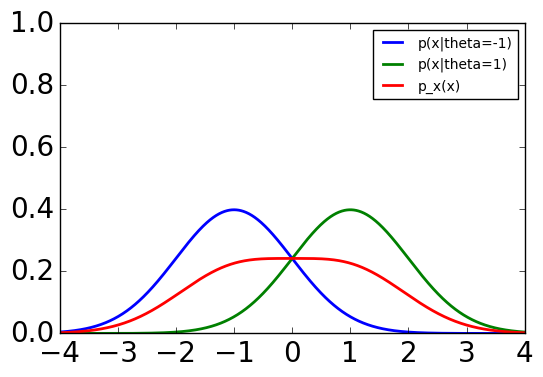

In [4]:
def p_x_given_theta(x, theta):
    return np.exp(-(x - theta)**2 / (2 * sigma_nu**2)) / np.sqrt(2 * np.pi * sigma_nu**2)

x = np.linspace(-4, 4, 1000)

p_x = np.zeros_like(x)
for theta in (-1, 1):
    y = p_x_given_theta(x, theta)
    p_x += 0.5 * y
    plt.plot(x, y, label='p(x|theta={})'.format(theta))

plt.plot(x, p_x, label='p_x(x)'.format(theta))

plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.legend()
plt.show()

# Display the PDFs interactively

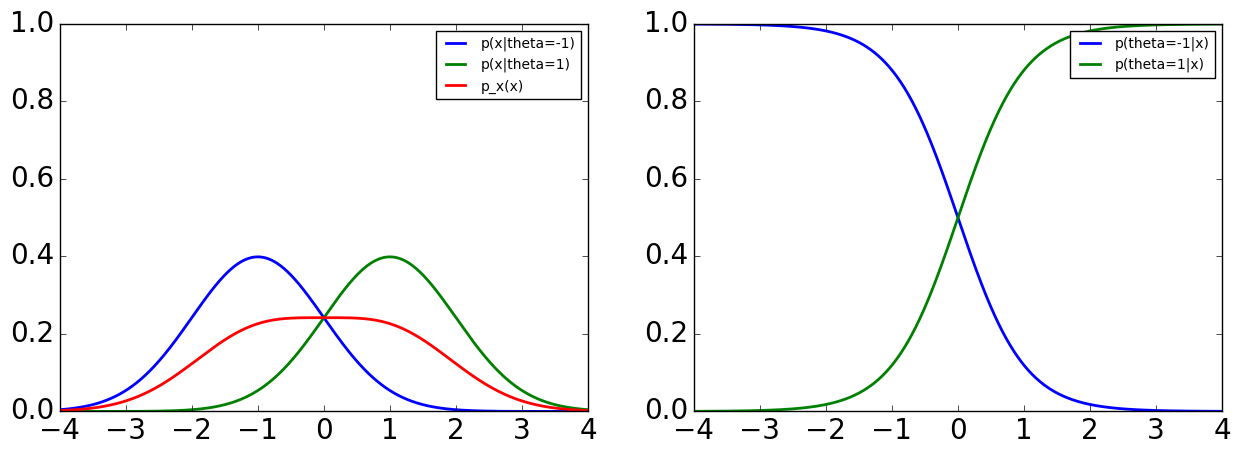

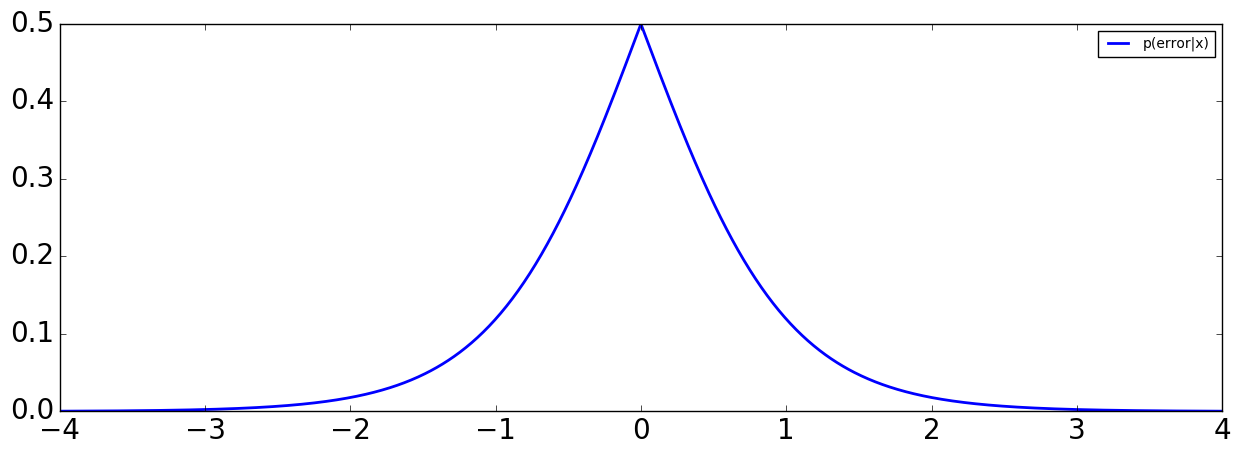

In [5]:
@interact(sigma_nu=FloatSlider(min=0.4, max=2., step = 0.2, value = 1))
def plot_pdfs(sigma_nu):
    def p_x_given_theta(x, theta):
        return np.exp(-(x - theta)**2 / (2 * sigma_nu**2)) / np.sqrt(2 * np.pi * sigma_nu**2)
        
    def p_theta_given_x(theta, x):
        return np.exp(theta * x / sigma_nu ** 2) / (np.exp(-x / sigma_nu ** 2) + np.exp(x / sigma_nu ** 2))
    
    x = np.linspace(-4, 4, 1000)

    # create two subplots
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    
    p_x = np.zeros_like(x)

    
    for theta in (-1, 1):
        y = p_x_given_theta(x, theta)
        p_x += 0.5 * y
        ax1.plot(x, y, label='p(x|theta={})'.format(theta))
        ax2.plot(x, p_theta_given_x(theta=theta, x=x), label='p(theta={}|x)'.format(theta))

    ax1.plot(x, p_x, label='p_x(x)'.format(theta))
    
    ax1.set_xlim([-4, 4])
    ax1.set_ylim([0, 1])
    
    ax2.set_xlim([-4, 4])
    ax2.set_ylim([0, 1])

    ax1.legend()
    ax2.legend()
        
    # plot error prob p_error|x
    f = plt.figure(figsize=(15,5))
    plt.plot(x, p_theta_given_x(theta=-1, x=abs(x)), label='p(error|x)')
    plt.legend()
    

## MMSE-estimator for multi-antenna

In [6]:
def mmse_estimator(x, sigma_nu):
        return np.tanh(np.sum(x, 0) / sigma_nu ** 2)

In [7]:
@interact(sigma_nu=FloatSlider(min=0.4, max=2., step = 0.2, value = 1), 
          N=IntSlider(min=1, max=20, step = 1, value = 1))
def mmse_estimator_loss(sigma_nu, N):
    
    theta = 1
    x = np.asarray(N * [theta]) + sigma_nu * np.random.randn(N)
    
    theta_hat = mmse_estimator(x, sigma_nu)
    print(np.abs(theta_hat-theta))
    
    

0.0142737236565


## Compare MMSE-estimator with suboptimal estimator

In [8]:
def suboptimal_estimator(x):
    return np.mean(x,0)

In [9]:
@interact(sigma_nu=FloatSlider(min=0.4, max=2., step = 0.2, value = 1), 
          N=IntSlider(min=1, max=200, step = 1, value = 1))
def mmse_vs_subpoptimal_estimator(sigma_nu, N):
    
    theta = 1
    x = np.asarray(N * [theta]) + sigma_nu * np.random.randn(N)
    theta_hat_mmse = mmse_estimator(x, sigma_nu)
    theta_hat_sub = suboptimal_estimator(x)
    
    print('Error of the MMSE-estimator: {}'.format(np.abs(theta_hat_mmse-theta)))
    print('Error of suboptimal estimator: {}'.format(np.abs(theta_hat_sub-theta)))

Error of the MMSE-estimator: 0.21025479461701768
Error of suboptimal estimator: 0.07075422119347996


## Compare MMSE-estimator, suboptimal estimator and sign based decision of the MMSE-estimated value 

In [10]:
def sign_mmse_estimate(theta_hat):
    return np.sign(theta_hat)

In [11]:
def RMSE(theta_hat, theta):
    return np.sqrt(np.mean((theta_hat-theta)**2))

In [12]:
@interact(sigma_nu=FloatSlider(min=0.4, max=2., step = 0.2, value = 1), 
          num_exp=IntSlider(min=1, max=1000, step = 1, value = 1))
def mmse_vs_subpoptimal_estimator(sigma_nu, num_exp):
    N = 10
    
    theta = np.asarray(num_exp * [1])
    x = np.asarray(N* [theta]) + sigma_nu * np.random.randn(N, num_exp)
    theta_hat_mmse = mmse_estimator(x, sigma_nu)
    theta_hat_sub = suboptimal_estimator(x)
    theta_hat_sign_mmse = sign_mmse_estimate(theta_hat_mmse)
    
    print('RMSE of the MMSE-estimator: {}'.format(RMSE(theta_hat_mmse, theta)))
    print('RMSE of suboptimal estimator: {}'.format(RMSE(theta_hat_sub, theta)))
    print('RMSE of sign of MMSE-estimated: {}'.format(RMSE(theta_hat_sign_mmse, theta)))

RMSE of the MMSE-estimator: 4.551914400963142e-15
RMSE of suboptimal estimator: 0.6862716526269701
RMSE of sign of MMSE-estimated: 0.0
